In [1]:
#데이터 가져오기
import pandas as pd

beauty_data = pd.read_csv('beauty_data_extend.csv')
df1 = beauty_data[['ER','active_rate']]

# print(df1.describe())

(928, 4)


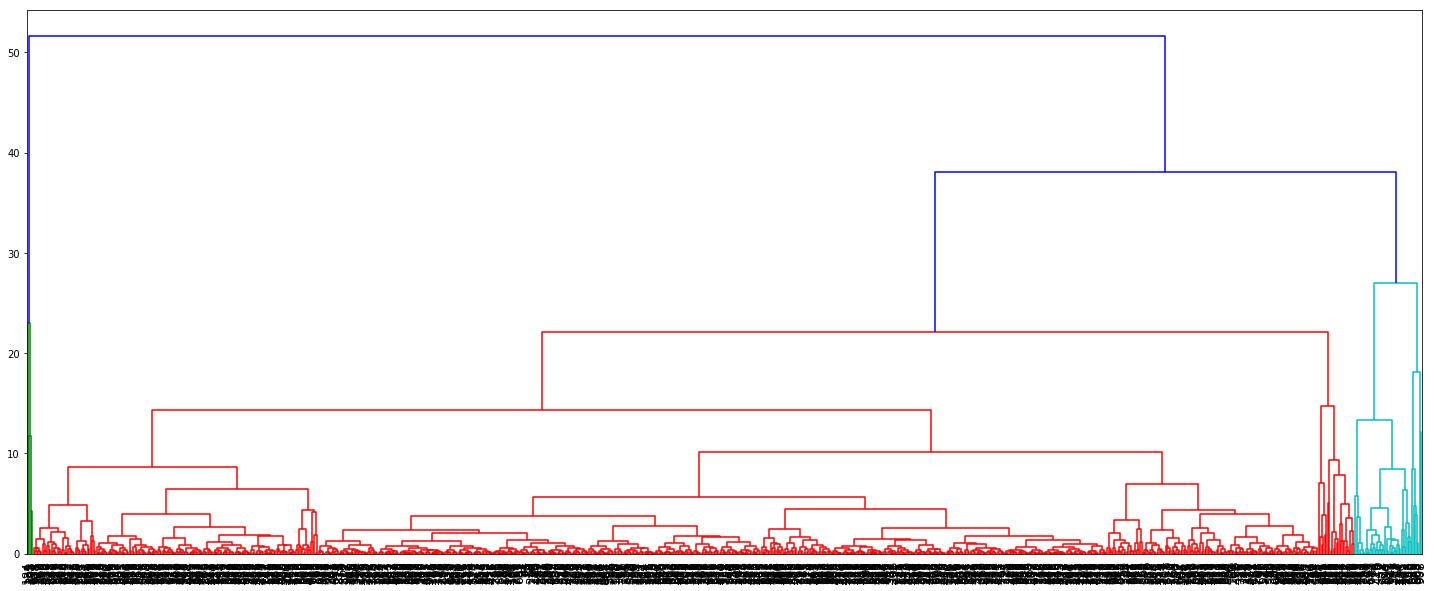

6


C:\Users\aaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


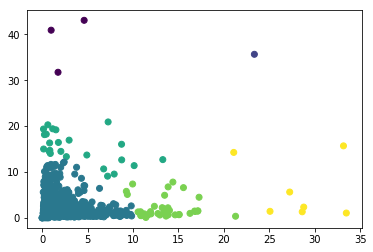

In [3]:
# Hierarchical clustering
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import fcluster # 지정한 클러스터 자르기

clusters = linkage(y=df1, method='complete', metric='euclidean')
print(clusters.shape)

plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show() 

cut_tree = fcluster(clusters, t=20, criterion='distance')
df1.head()
df1['predict'] = cut_tree
print(df1['predict'].max())

plt.scatter(x=df1['ER'], y=df1['active_rate'], c=df1['predict'])

In [23]:
# 생성된 cluster 별 데이터프레임 형성

cs_1 = df1[df1['predict'] == 1]
cs_2 = df1[df1['predict'] == 2]
cs_3 = df1[df1['predict'] == 3]
cs_4 = df1[df1['predict'] == 4]
cs_5 = df1[df1['predict'] == 5]
cs_6 = df1[df1['predict'] == 6]
cl_lst = [cs_1, cs_2, cs_3, cs_4, cs_5, cs_6]
count_lst = []
ER_lst = []
active_rate_lst = []

for i in cl_lst:
    count_lst.append(len(i))
    ER_lst.append(i['ER'].mean())
    active_rate_lst.append(i['active_rate'].mean())

# 각 클러스터 정의를 위한 ER, active_rate 지수 평균 확인

df = pd.DataFrame([count_lst, ER_lst, active_rate_lst])
df = df.T
df.columns = [["count", "ER", "active_rate"]]

df

# cluster 0: ER에 비해 active_rate 월등히 높음 - 3
# cluster 1: ER과 active_rate 모두 월등히 높음 - 1
# cluster 2: ER과 active_rate 모두 낮음 - 856
# cluster 3: ER에 비해 active_rate 높음 - 24
# cluster 4: active_rate에 비해 ER 높음 - 38
# cluster 5: active_rate에 비해 ER 월등히 높음 - 7

,count,ER,active_rate
0,3.0,2.455841,38.549035
1,1.0,23.355860,35.634461
2,856.0,2.027031,2.682755
3,24.0,3.840033,15.289049
4,38.0,13.493479,2.147671
5,7.0,28.207050,5.958532


In [31]:
# 군집 내부 follower, ER, active_rate 정보 탐색
r1 = df1['predict']
beauty_data_cluster = pd.concat([beauty_data, r1], axis=1)
beaa = beauty_data_cluster[['follower','ER','active_rate', 'predict']]

c = beaa[beaa['predict'] == 6]
print(c)

     follower         ER  active_rate  predict
72     453463  25.077459     1.422545        6
609      4287  28.621414     1.320132        6
620      5449  33.474032     1.052049        6
663      4391  28.786153     2.346278        6
686      4269  27.242914     5.626134        6
697      5658  21.085189    14.258373        6
908      3311  33.162187    15.684211        6
